In [1]:
import zipfile
import os

zip_file_name = 'Dataset.zip' 

zip_file_path = os.path.join('.', zip_file_name)

extract_path = '.'

if os.path.exists(zip_file_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"'{zip_file_name}' was successfully extracted.")
else:
    print(f"File '{zip_file_name}' not found in this path.")

'Dataset.zip' was successfully extracted.


In [21]:
import numpy as np
import pandas as pd

train_dir = 'Training'
test_dir = 'Testing'

if os.path.exists(train_dir) and os.path.exists(test_dir):
    print(f"\nFolder '{train_dir}' found.")
    print(f"Folder '{test_dir}' found.")
    
    class_names = sorted(os.listdir(train_dir))
    
    print("\nMain paths defined:")
    print(f"Training path: {train_dir}")
    print(f"Test path: {test_dir}")
    print(f"classes: {class_names}")
    
    print("\n Number of images per class (education folder) :")
    for class_name in class_names:
        class_path = os.path.join(train_dir, class_name)
        num_images = len(os.listdir(class_path))
        print(f"{class_name}: {num_images} تصویر")
else:
    print("\nTraining and/or Testing folders not found.")


Folder 'Training' found.
Folder 'Testing' found.

Main paths defined:
Training path: Training
Test path: Testing
classes: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

 Number of images per class (education folder) :
glioma_tumor: 826 تصویر
meningioma_tumor: 822 تصویر
no_tumor: 395 تصویر
pituitary_tumor: 827 تصویر


In [3]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [4]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [5]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

for i in labels:
    folderPath = os.path.join('Training', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('Testing', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

print(f"Total images in X_train: {len(X_train)}")

Total images in X_train: 3264


In [6]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [8]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [9]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

C:\Users\Erfan-Mingli\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 146, 146, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 69, 69, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 69, 69, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [12]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 51s 585ms/step - accuracy: 0.2864 - loss: 1.6870 - val_accuracy: 0.2891 - val_loss: 1.3582
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 48s 576ms/step - accuracy: 0.4642 - loss: 1.2148 - val_accuracy: 0.5034 - val_loss: 1.0596
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 47s 565ms/step - accuracy: 0.5952 - loss: 0.9531 - val_accuracy: 0.5918 - val_loss: 0.9276
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 49s 594ms/step - accuracy: 0.6379 - loss: 0.8436 - val_accuracy: 0.6224 - val_loss: 0.8103
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 48s 575ms/step - accuracy: 0.6962 - loss: 0.7222 - val_accuracy: 0.6939 - val_loss: 0.7044
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 49s 585ms/step - accuracy: 0.7435 - loss: 0.6222 - val_accuracy: 0.6224 - val_loss: 0.8757
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 47s 564ms/step - accuracy: 0.7650 - loss: 0.5617 - val_accuracy: 0.6939 - val_loss: 0.7263
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 47s 572ms/step - accuracy: 0.7972 - loss: 0.5087 - val_accu

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

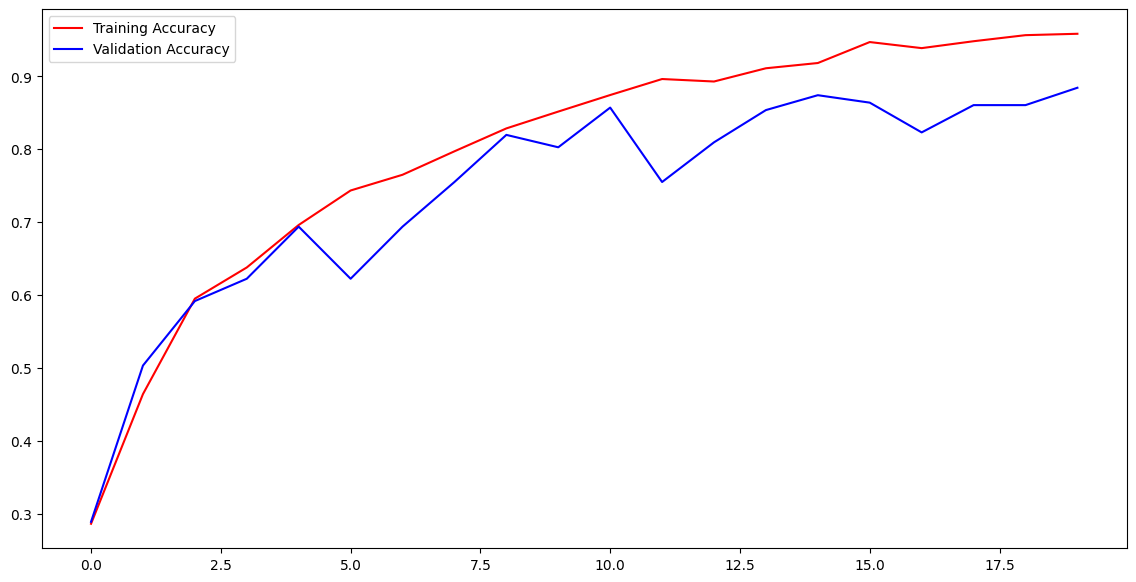

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

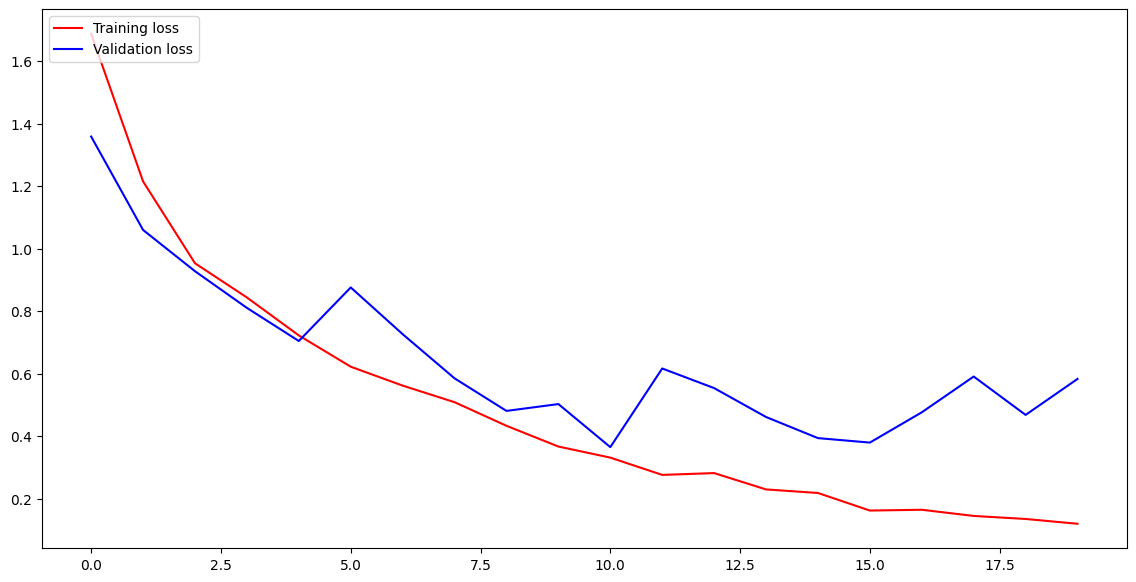

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [22]:
import random

random_index = random.randint(0, len(X_test) - 1)

random_image = X_test[random_index]
true_label_one_hot = y_test[random_index]

print(f"Selected image dimensions: {random_image.shape}")

image_for_prediction = np.expand_dims(random_image, axis=0)
print(f"Image dimensions for model input: {image_for_prediction.shape}")

prediction = model.predict(image_for_prediction)

predicted_class_index = np.argmax(prediction)
true_class_index = np.argmax(true_label_one_hot)

predicted_label = labels[predicted_class_index]
true_label = labels[true_class_index]

print(f"\nActual label: {true_label}")
print(f"Predicted label: {predicted_label}")

Selected image dimensions: (150, 150, 3)
Image dimensions for model input: (1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

Actual label: glioma_tumor
Predicted label: glioma_tumor


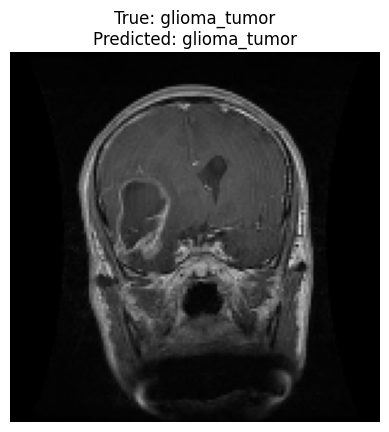

In [23]:
import matplotlib.pyplot as plt

plt.imshow(random_image)
plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
plt.axis('off') 
plt.show()